In [1]:
from FUNCTIONS import *
%matplotlib inline

TensorFlow Version:  2.1.0


Total Events: 200000
Total Labels: 200000

Shape:  (200000, 1600)

Train:  (139400, 1600) (139400,)
Val:  (30600, 1600) (30600,)
Test:  (30000, 1600) (30000,)
 


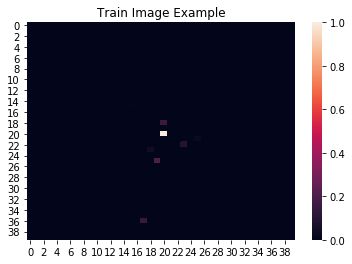

In [2]:
# MAIN
data_s = np.array(pd.read_csv('data/data_s_100k_normal').iloc[:, 1:])
data_b = np.array(pd.read_csv('data/data_b_100k_normal').iloc[:, 1:])

# Slice & Save
events_no = int(1e5)
data_s = data_s[0:events_no*40, 0:40]
data_b = data_b[0:events_no*40, 0:40]

# # Save Datasets
# pd.DataFrame(data_s).to_csv('data_s_1000')
# pd.DataFrame(data_b).to_csv('data_b_1000')

train_examples, train_labels, val_examples, val_labels, test_examples, test_labels = preprocess_ML_sklearn(data_s, data_b)

import sklearn.discriminant_analysis
random.seed(42)

random_forest = RandomForestClassifier(random_state=42, n_jobs=-1)
svm = SVC(random_state=42)
adaboost = AdaBoostClassifier(random_state=42)
KNN = sklearn.neighbors.KNeighborsClassifier()
naive_bayes = MultinomialNB()
BDT = sklearn.ensemble.GradientBoostingClassifier()
decision_tree = DecisionTreeClassifier(random_state=42)
naive_bayes_g = GaussianNB()
bagging = BaggingClassifier(random_state=42, n_jobs=-1)
SGD = sklearn.linear_model.SGDClassifier(random_state=42)
LDA = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()


models = [naive_bayes, random_forest, svm, adaboost, KNN, BDT, decision_tree, naive_bayes_g, bagging, SGD, LDA]

In [3]:
# Fit Models
for model in models:
    model.fit(train_examples, train_labels)

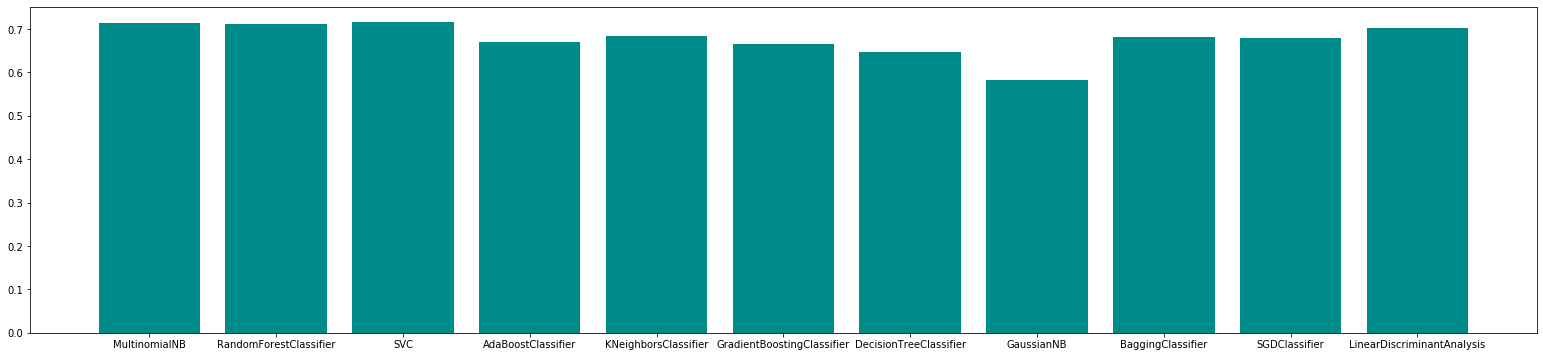

Accuracy
0.7157 SVC
0.7147 MultinomialNB
0.7109 RandomForestClassifier
0.7027 LinearDiscriminantAnalysis
0.6830 KNeighborsClassifier
0.6816 BaggingClassifier
0.6786 SGDClassifier
0.6701 AdaBoostClassifier
0.6660 GradientBoostingClassifier
0.6467 DecisionTreeClassifier
0.5834 GaussianNB


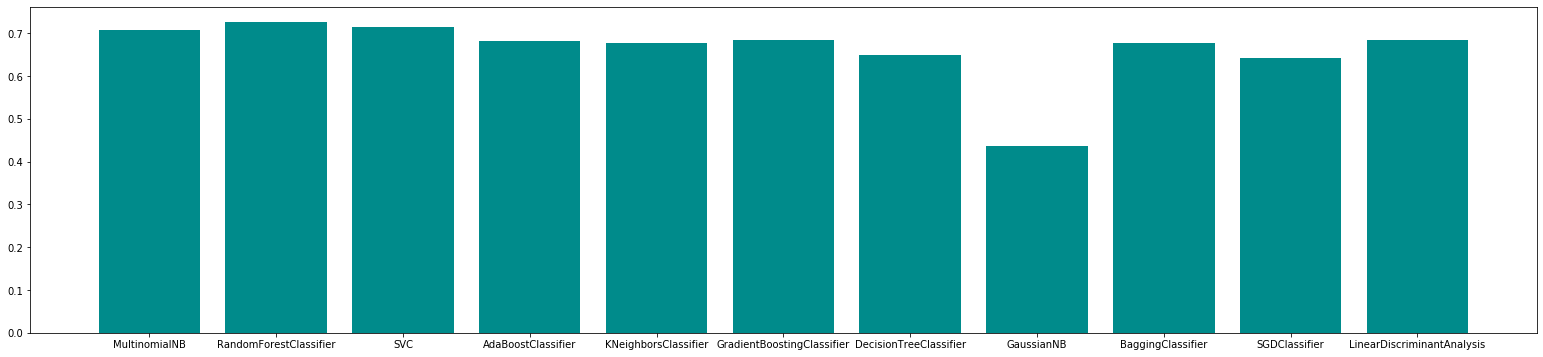

F1score
0.7259 RandomForestClassifier
0.7136 SVC
0.7075 MultinomialNB
0.6848 GradientBoostingClassifier
0.6843 LinearDiscriminantAnalysis
0.6831 AdaBoostClassifier
0.6782 KNeighborsClassifier
0.6778 BaggingClassifier
0.6495 DecisionTreeClassifier
0.6413 SGDClassifier
0.4361 GaussianNB


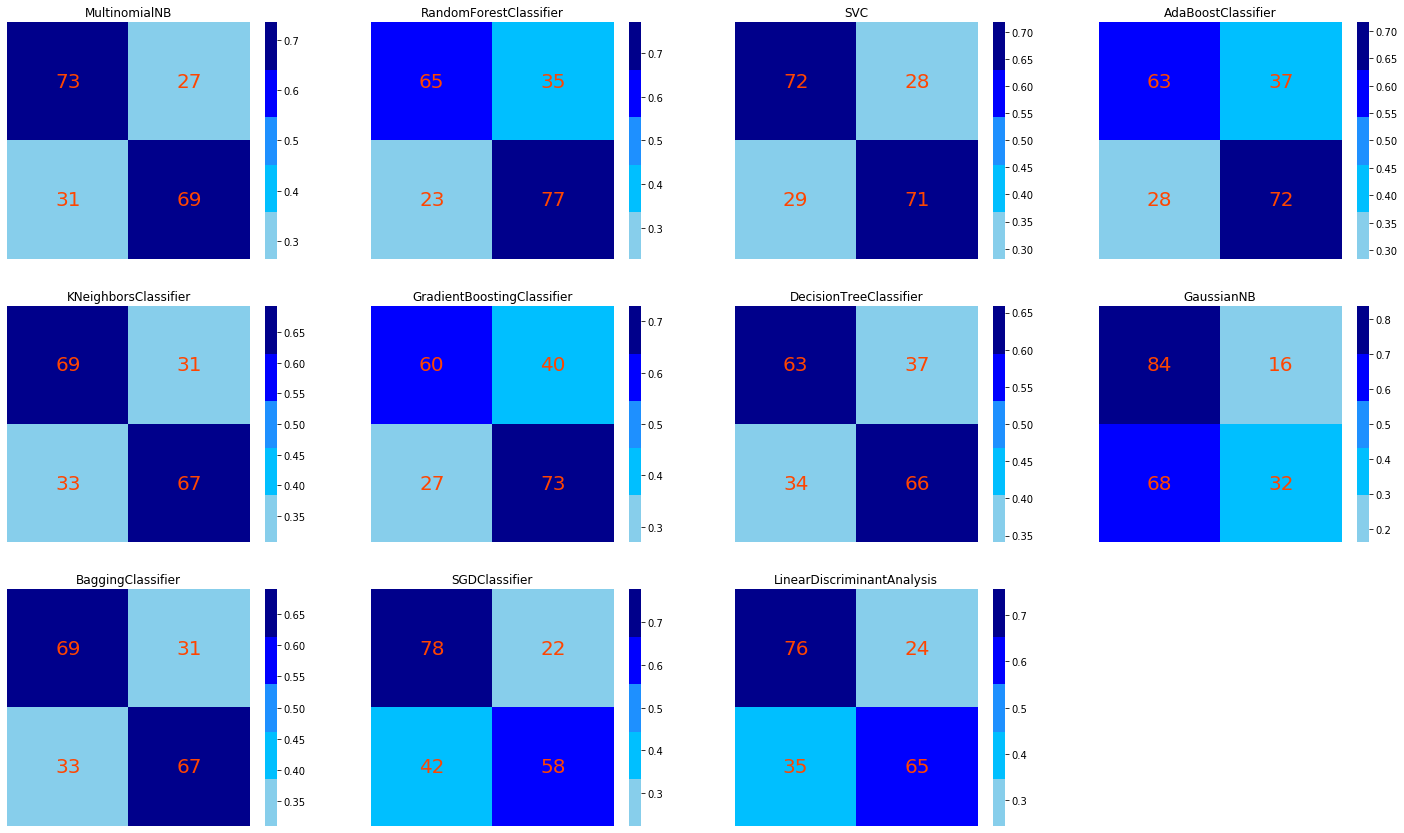

In [4]:
compare_accuracy(models, test_examples, test_labels)
compare_f1(models, test_examples, test_labels)
cmx_sklearn(models, test_examples, test_labels, dim=4)